<a href="https://colab.research.google.com/github/luckyme410/segment_EMC/blob/main/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сегментируем клиентов банка, используя их личные данные такие, как:
пол, возраст клиента, уровень образования, сколько лет является клиентом банка, число депозитов, общая сумма вкладов.

In [ ]:
import numpy as np
import pandas as pd

### Генерация данных

In [ ]:
# пол клиента:
gender = ['муж', 'жен',]

# уровни образования:
education = ['сред', 'спец', 'неок высш', 'высш', 'другое']
edu_frac = np.array([0.15, 0.23, 0.2, 0.35, 0.07])  # доли

# возрастной диапазон:
ages = np.arange(16, 88)


# диапазон суммы вкладов (руб):
total_sum = np.arange(0, 1e8)


In [ ]:
# имя и фамилия для муж.:
name_male = ['Иван', "Алексей", "Александр",
             "Дмитрий", "Никита", "Константин"
]

lname_male = ["Смирнов", "Иванов", "Кузнецов",
              "Соколов", "Попов", "Лебедев",
              "Козлов", "Новиков", "Морозов",
              'Петров', "Волков", 'Соловьёв',
              "Васильев", "Зайцев", "Павлов",
              'Семёнов', "Голубев", "Виноградов",
              "Богданов", "Воробьёв"
]


# имя и фамилия для жен.
name_female = ['Анастасия', "Елена", "Анна",
               "Дарья", "Мария", "София", 'Наталья',
               "Екатерина", "Юлия", "Ирина"
]

lname_female = [s + 'а' for s in lname_male]

Для каждого клиента генерим его ФИО, пол, возраст итд:

In [ ]:
# кол-во клиентов
num_clients = 1000

np.random.seed(10)


col_gender = np.random.choice(gender,
                              size=num_clients ,
                              replace=True
                             )


col_education = np.random.choice(education,
                                 size=num_clients,
                                 replace=True,
                                 p=edu_frac)


mu = np.mean(ages)
std = np.std(ages)/3
col_age = np.clip(np.random.normal(mu, std, size=num_clients), a_min=ages.min(),
                  a_max=ages.max())
col_age = np.round(col_age)


# число депозитов в банке:
lam = 0.75
col_deposits = np.random.poisson(lam, size=num_clients)


lam = 2.0
col_years = np.round(np.random.exponential(lam, size=num_clients))


# сумма всех вкладов:
mu = np.mean(total_sum)
std = np.mean(total_sum)
col_depsosit_sum = np.clip(np.random.normal(mu, std, size=num_clients),
                           a_min=total_sum.min(),
                           a_max=2*total_sum.max())

col_depsosit_sum = 1*(col_deposits != 0) * col_depsosit_sum


# ФИО:
def get_name(sex):
  if sex=='муж':
    name =  np.random.choice(lname_male) + ' ' + np.random.choice(name_male)
  else:
    name = np.random.choice(lname_female) + ' ' + np.random.choice(name_female)

  return name

col_clients = list(map(lambda x: get_name(x) , col_gender))

In [ ]:
voc = {"client": col_clients,
       'gender': col_gender,
       'age': col_age,
       'education': col_education,
       'num_years': col_years,
       'num_deposits': col_deposits,
       'total_deposits_sum': col_depsosit_sum
}

df = pd.DataFrame(voc)

In [ ]:
df.head()

,client,gender,age,education,num_years,num_deposits,total_deposits_sum
0,Семёнова Юлия,жен,62.0,сред,2.0,0,0.000000e+00
1,Зайцева Ирина,жен,52.0,сред,3.0,1,2.302557e+07
2,Морозов Никита,муж,52.0,спец,0.0,1,7.504340e+07
3,Морозова Ирина,жен,42.0,сред,3.0,0,0.000000e+00
4,Смирнов Никита,муж,51.0,высш,1.0,1,0.000000e+00


Сохраним данные в excel формате:

In [ ]:
df.to_excel('clients.xlsx', index=False)

### Анализ данных:

Посмотрим на клиентов, какие признаки у них есть и их распределения.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [ ]:
# читаем данные:
df = pd.read_excel("clients.xlsx")
#df2 = pd.read_json("/content/clients2.json")

In [ ]:
#df = pd.concat([df1, df2], axis=0)
#assert df.shape[0] == (df1.shape[0] + df2.shape[0])
#assert df.shape[1] == df1.shape[1]

In [ ]:
# всего клиентов:
print("Всего клиентов:", df.shape[0])

Всего клиентов: 1000


In [ ]:
df.head()

,client,gender,age,education,num_years,num_deposits,total_deposits_sum
0,Семёнова Юлия,жен,62,сред,2,0,0.000000e+00
1,Зайцева Ирина,жен,52,сред,3,1,2.302557e+07
2,Морозов Никита,муж,52,спец,0,1,7.504340e+07
3,Морозова Ирина,жен,42,сред,3,0,0.000000e+00
4,Смирнов Никита,муж,51,высш,1,1,0.000000e+00


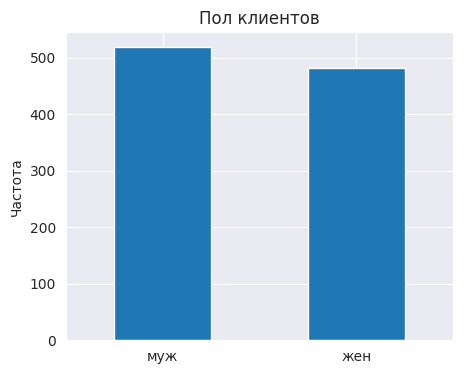

In [ ]:
# пол:
plt.figure(figsize=(5, 4))
plt.title('Пол клиентов')
df['gender'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Частота')
plt.xlabel('');

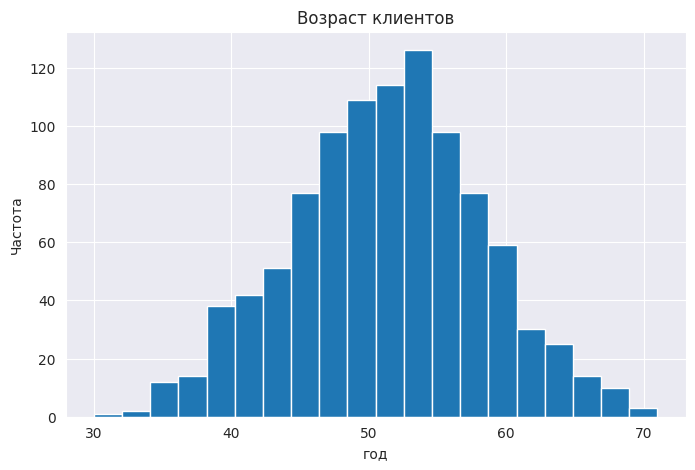

In [ ]:
plt.figure(figsize=(8, 5))
plt.title('Возраст клиентов')
df['age'].plot(kind='hist', bins=20)
plt.xlabel('год')
plt.ylabel('Частота');

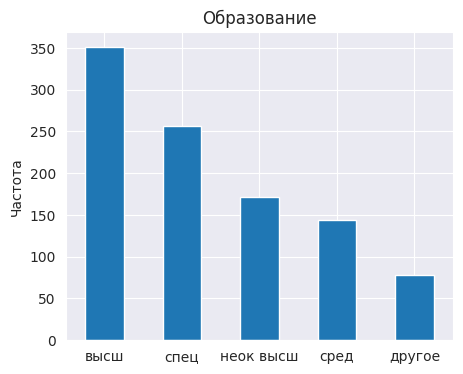

In [ ]:
# образование:
plt.figure(figsize=(5, 4))
plt.title('Образование')
df['education'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Частота')
plt.xlabel('');

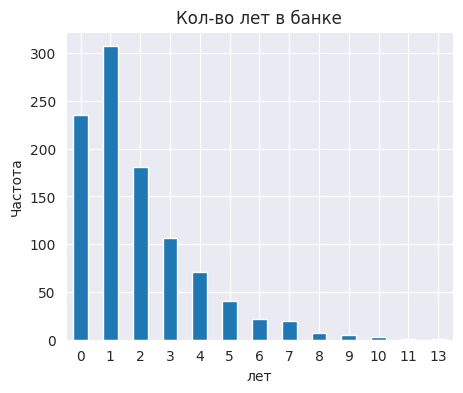

In [ ]:
# сколько лет обслуживаются в банке:
plt.figure(figsize=(5, 4))
plt.title('Кол-во лет в банке')
df['num_years'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Частота')
plt.xlabel('лет');

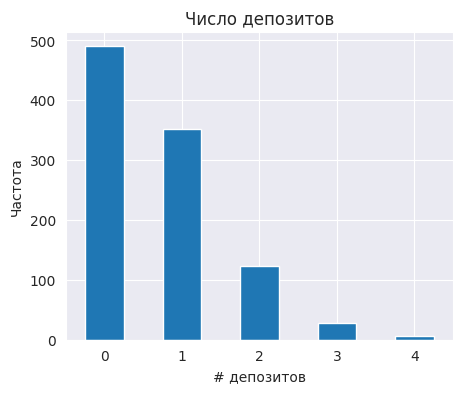

In [ ]:
# число депозитов
plt.figure(figsize=(5, 4))
plt.title('Число депозитов')
df['num_deposits'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.ylabel('Частота')
plt.xlabel('# депозитов');

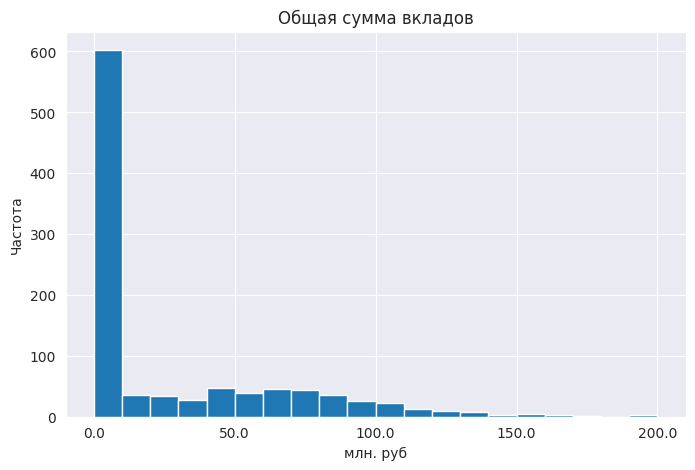

In [ ]:
plt.figure(figsize=(8, 5))
plt.title('Общая сумма вкладов')
df['total_deposits_sum'].plot(kind='hist', bins=20)
plt.xticks(np.linspace(0, df['total_deposits_sum'].max(), 5), np.linspace(0, 200, 5))
plt.xlabel('млн. руб')
plt.ylabel('Частота');

### Преобразование данных

Возраст и общую сумму депозитов будем считать числовыми признаками, а все остальные - категориальными.

In [ ]:
from sklearn.preprocessing import OneHotEncoder as OHE

In [ ]:
# удалим ФИО клиента:
del df['client']

Чтобы масштабы признаков не влияли на сегментацию, нормируем численные признаки (StandardScaler).

In [ ]:
# нормируем age и total_deposits_sum:
age_mu, age_std = df['age'].mean(), df['age'].std()
dep_sum_mu, dep_sum_std = df['total_deposits_sum'].mean(), df['total_deposits_sum'].std()
df['age'] = (df['age'] - age_mu) / age_std
df['total_deposits_sum'] = (df['total_deposits_sum'] - dep_sum_mu) /dep_sum_std

Категориальные признаки закодируем OneHotEncoder'ом.

In [ ]:
# остальные признаки преобразуем, используя OHE:
names = [name for name in df.columns if name not in ('age', 'total_deposits_sum')]
names

['gender', 'education', 'num_years', 'num_deposits']

In [ ]:
for name in names:
  print(name, df[name].nunique())

gender 2
education 5
num_years 13
num_deposits 5


In [ ]:
ohe = OHE(sparse_output=False,
          drop='if_binary',
          feature_name_combiner='concat')

m_cat = ohe.fit_transform(df[names])

In [ ]:
ohe.get_feature_names_out()

array(['gender_муж', 'education_высш', 'education_другое',
       'education_неок высш', 'education_спец', 'education_сред',
       'num_years_0', 'num_years_1', 'num_years_2', 'num_years_3',
       'num_years_4', 'num_years_5', 'num_years_6', 'num_years_7',
       'num_years_8', 'num_years_9', 'num_years_10', 'num_years_11',
       'num_years_12', 'num_deposits_0', 'num_deposits_1',
       'num_deposits_2', 'num_deposits_3', 'num_deposits_4',
       'num_deposits_5'], dtype=object)

In [ ]:
# объединим преобразованные признаки:
X = pd.concat([df[['age', 'total_deposits_sum']],
               pd.DataFrame(m_cat, columns=ohe.get_feature_names_out())],
              axis=1)

In [ ]:
X.head()

,age,total_deposits_sum,gender_муж,education_высш,education_другое,education_неок высш,education_спец,education_сред,num_years_0,num_years_1,...,num_years_8,num_years_9,num_years_10,num_years_11,num_years_13,num_deposits_0,num_deposits_1,num_deposits_2,num_deposits_3,num_deposits_4
0,1.580096,-0.675107,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.108185,-0.083432,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.108185,1.253242,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-1.363725,-0.675107,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.039006,-0.675107,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Кластеризация Kmeans

Используем кластеризацию Kmeans. Оптимальное кол-во кластеров подберем с помощью метода 'локтя'.

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.spatial.distance import cdist

In [ ]:
distances = []

# диапазон числа кластеров от 1 до 20:
for k in range(1, 21):
  kmeans = KMeans(n_clusters=k, init='k-means++').fit(X)

  # среднее расстояние от точки до центра кластера:
  dist = sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)**2 / X.shape[0])
  distances.append(dist)

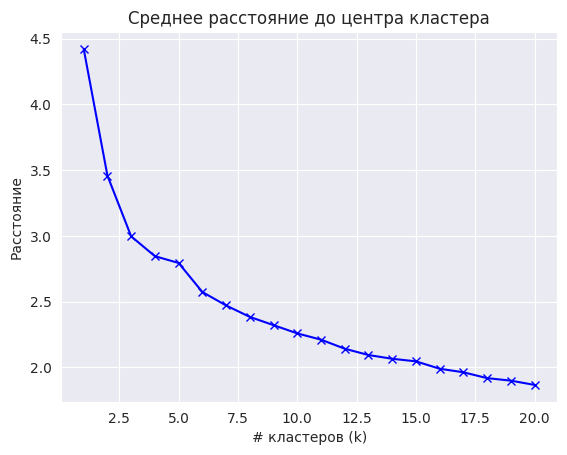

In [ ]:
plt.plot(range(1, 21), distances, 'bx-')
plt.xlabel('# кластеров (k)')
plt.ylabel('Расстояние')
plt.title('Среднее расстояние до центра кластера')
plt.show();

Значительный прирост среднего расстояния происходит при переходе от 3 кластеров к 2, либо от 2 к 1. Рассмотрим вариант с 3 кластерами.

In [ ]:
# 3 кластера:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=12).fit(X)

In [ ]:
# число клиентов в каждом кластере:
y = kmeans.predict(X)
for i in range(k):
  print(f"кластер #{i+1}, число клиентов: {(y==i).sum()}")

кластер #1, число клиентов: 391
кластер #2, число клиентов: 282
кластер #3, число клиентов: 327


In [ ]:
X['cluster'] = y
df['cluster'] = y

In [ ]:
X.iloc[:, 0] = X.iloc[:, 0] * age_std + age_mu
X.iloc[:, 1] = X.iloc[:, 1] * dep_sum_std + dep_sum_mu

###  Сравним клиентов банка из каждого кластера.

In [ ]:
cluster_centers = X.groupby('cluster').mean()
cluster_centers

,age,total_deposits_sum,gender_муж,education_высш,education_другое,education_неок высш,education_спец,education_сред,num_years_0,num_years_1,...,num_years_8,num_years_9,num_years_10,num_years_11,num_years_13,num_deposits_0,num_deposits_1,num_deposits_2,num_deposits_3,num_deposits_4
cluster,,,,,,,,,,,,,,,,,,,,,
0,56.071611,3.822961e+06,0.514066,0.342711,0.086957,0.150895,0.268542,0.150895,0.232737,0.299233,...,0.010230,0.005115,0.007673,0.002558,0.000000,0.687980,0.212276,0.066496,0.023018,0.010230
1,52.138298,8.096648e+07,0.503546,0.393617,0.074468,0.163121,0.234043,0.134752,0.223404,0.358156,...,0.003546,0.003546,0.000000,0.000000,0.003546,0.000000,0.695035,0.237589,0.056738,0.010638
2,44.764526,5.948223e+06,0.538226,0.324159,0.070336,0.201835,0.259939,0.143731,0.247706,0.272171,...,0.006116,0.006116,0.000000,0.000000,0.000000,0.675841,0.223242,0.091743,0.009174,0.000000


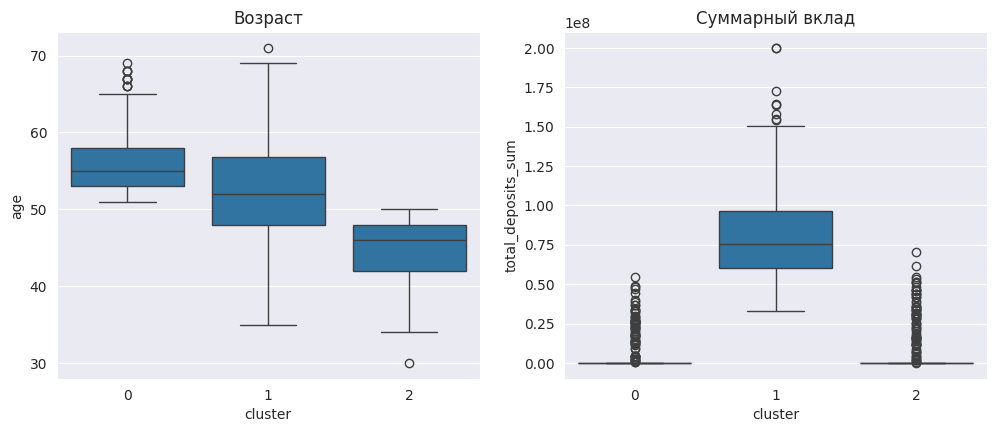

In [ ]:
plt.figure(figsize=(12, 4.5))
ax1 = plt.subplot(121)
sns.boxplot(x='cluster',
            y='age',
            data=X,
            ax=ax1)
plt.title('Возраст');

ax2 = plt.subplot(122)
plt.title('Суммарный вклад')
sns.boxplot(x='cluster',
            y='total_deposits_sum',
            data=X,
            ax=ax2);

cluster
0    2.105321e+07
1    8.096648e+07
2    2.664478e+07
Name: total_deposits_sum, dtype: float64


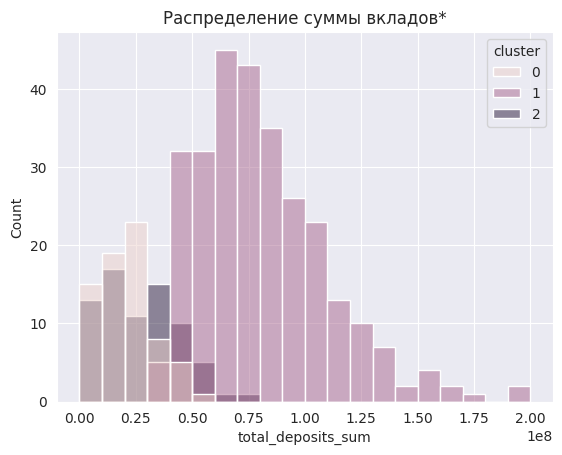

In [55]:
# распределение сумм вкладов по кластерам. Только клиенты с суммой > 0
mask = X["total_deposits_sum"] > 0.


print(X.loc[mask].groupby('cluster')["total_deposits_sum"].mean())
sns.histplot(x='total_deposits_sum',
             hue='cluster',
             data=X.loc[mask, :],
             bins=20)
plt.title('Распределение суммы вкладов*');

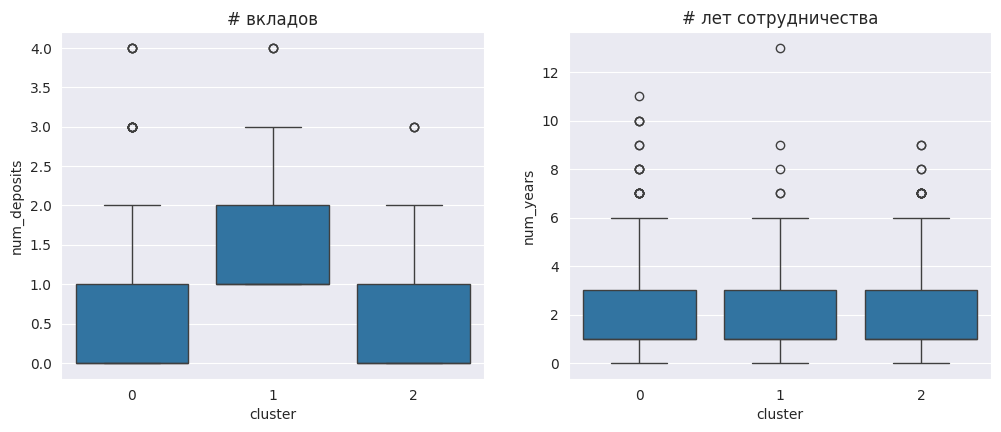

In [ ]:
plt.figure(figsize=(12, 4.5))
ax1 = plt.subplot(121)
sns.boxplot(x='cluster',
            y='num_deposits',
            data=df,
            ax=ax1)
plt.title('# вкладов')

ax2 = plt.subplot(122)
plt.title('# лет сотрудничества')
sns.boxplot(x='cluster',
            y='num_years',
            data=df,
            ax=ax2);

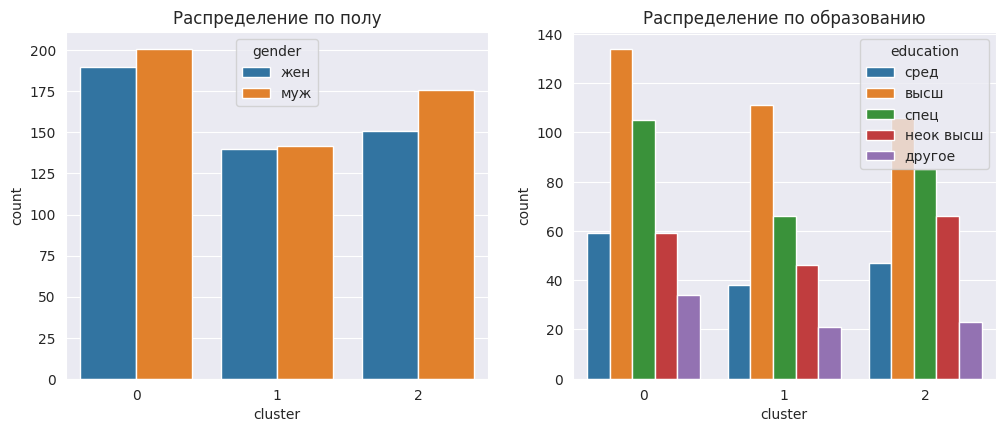

In [ ]:
plt.figure(figsize=(12, 4.5))
ax1 = plt.subplot(121)
sns.countplot(hue='gender',
            x='cluster',
            data=df,
            ax=ax1)
plt.title('Распределение по полу');

ax2 = plt.subplot(122)
sns.countplot(hue='education',
            x='cluster',
            data=df,
            ax=ax2)
plt.title('Распределение по образованию');

В кластере №0 люди постарше, а в 2-ом - помоложе.

В кластере №1 собраны клиенты побогаче, средний вклад ~ 80 млн. рублей, против 5 млн. в остальных. В нем нет клиентов без вкладов (num_deposits_0 = 0), да и клиентов с несколькими депозитами больше.
